## 4-2 : Head Loss Downscaling
<em>Created by Tomás Cuevas López in 2024, modified by Casey Dietrich in 2024.</em><br>
<br>
This example will show how to downscale the ADCIRC water levels by using the head-loss method.<br>
<br>
As described in the previous example, *Kalpana* has two downscaling methods: (a) static, in which the water surface is extrapolated as a flat surface, and (b) head loss, in which the water surface is reduced due to friction as it is extrapolated over vegetated regions.<br>
<br>
The head loss downscaling method requires a cost surface, which is computed from a land-cover raster. We assume the cost surface has been precomputed (as in the previous example), and herein we use that cost surface as an input to the downscaling.<br>
<br>
We use files from a simulation of Hurricane Ida, which devastated the south Louisiana coast in 2021. To minimize the file sizes in this repository, we created a small mesh that includes Grand Isle and Barataria Bay. Then we simulated Ida by using the NHC best-track storm parameters in a vortex wind model. The simulated storm effects are meant to be useful as an example, but they should not be relied on for any decision making.

## Preliminaries

In [4]:
import os
import shutil
from pathlib import Path
from kalpana.downscalingHeadLoss import preCompCostSurface, runHeadLoss
from IPython.display import display, Image

## Head Loss Downscaling

First we set the necessary input parameters for the <code>runHeadLoss</code> function. Note that we must specify the full paths to the cost rasters and the corrected DEM (which were precomputed in the previous example).

In [2]:
######## For more detail about the runHeadLoss inputs, please read the function's docstring.

## Full path of the ADCIRC maxele file.
cwd = Path(os.getcwd())
ncFile = str(cwd.parent.parent/'adds'/'ida'/'maxele.63.nc') 

## Contour levels to use in the downscaling.
## From 0 to 6 m (included) every 0.5 m.
levels = [0, 6, 0.5]

## Projection to use for the output downscaled DEM.
## In this example, we use pseudo-Mercator (3857), but a user could also use UTM (e.g. 6344, 6345).
epsgOut = 3857

## Vertical unit of the downscaled water levels.
vUnitOut = 'm'

## Full path for the output downscaled DEM.
## Same path is used for saving rasters and the grass location.
pathOut = os.path.join(os.getcwd(), 'maxele_Ida.shp')

## Version of GRASS GIS.
grassVer = 8.3 ## versions 8.2 and 8.3 work

## Path to the folder with the input DEM with the ground surface elevations.
pathRasFiles = str(cwd.parent.parent/'adds'/'ida')

## Name(s) of input DEM(s) with the ground surface elevations.
rasterFiles = 'CUDEM_merged_10m_crs3857.tif'

## Full path of the precomputed raw cost raster.
rawCostRas = os.path.join(cwd, 'rawCostRaster.tif')

## Full path of the precomputed total cost raster.
totalCostRas = os.path.join(cwd, 'totalCostRaster.tif')

## Full path of the corrected downscaling DEM
corrDownDEM = os.path.join(cwd, 'downDemCorr.tif')

## Bounding box for the downscaling raster.
## Full path of file (kml, kmz, shp, gpkg, tif) to crop the domain.
## In this example, we will use the same downscaling raster bounding box as the input DEM. 
subDomain = os.path.join(pathRasFiles, rasterFiles)

## Projection (epsg code or crs) of the subDomain.
## In this example, as we are using the downscaling dem bounding box as the subdomain, so the same epsg code must be specified.
epsgSubDom = epsgOut

Now, let's call the <code>runHeadLoss</code> function with the parameters we defined. This may take a few minutes, especially if the input DEM and/or ADCIRC mesh are large.

In [3]:
runHeadLoss(ncFile, levels, epsgOut, vUnitOut, pathOut, grassVer, pathRasFiles, rasterFiles,
            rawCostRas, totalCostRas, corrDownDEM, epsgIn=4326, vUnitIn='m', var='zeta_max', conType ='polygon', 
            subDomain=subDomain, epsgSubDom=epsgSubDom, dzFile=None, zeroDif=-20, distThreshold=1, k=7,
            exagVal=1, nameGrassLocation=None, createGrassLocation=True, createLocMethod='from_raster', 
            attrCol='zMean', floodDepth=False, ras2vec=False, exportOrg=False, leveesFile = None, finalOutToLatLon=False)

2024-07-26 09:03:54.069 | INFO     | kalpana.export:nc2shp:817 - Start exporting adcirc to shape
2024-07-26 09:03:54.684 | INFO     | kalpana.export:filledContours2gpd:311 - Begin computing contours using Dask
2024-07-26 09:03:54.760 | INFO     | kalpana.export:filledContours2gpd:313 - Finnished computing contours using Dask
2024-07-26 09:03:54.771 | INFO     | kalpana.export:nc2shp:847 -     Ready with the contours extraction: 0.011 min
2024-07-26 09:03:54.832 | INFO     | kalpana.export:nc2shp:855 -     Cliping contours based on mask: 0.001 min
2024-07-26 09:03:54.841 | INFO     | kalpana.export:nc2shp:873 -     Changing CRS: 0.000 min
2024-07-26 09:03:54.929 | INFO     | kalpana.export:nc2shp:884 -     Saving file: 0.001 min
2024-07-26 09:03:54.930 | INFO     | kalpana.export:nc2shp:901 - Ready with exporting code after: 0.014 min
2024-07-26 09:03:54.930 | INFO     | kalpana.downscalingHeadLoss:runHeadLoss:580 - Head loss downscaling started
2024-07-26 09:03:55.075 | INFO     | kalp

## Different Extents of Downscaled Water Levels

The output of this function is a raster with the downscaled maximum water levels (<code>maxele_Ida_level_downscaled_headLoss.tif</code>). It is similar to the downscaled output from the static method (e.g. Example 3-2), but now it uses the head loss method to account for overland friction in the extrapolation. The result is that the downscaled water surface will have different extents.<br>
<br>
This is obvious when looking at the overall raster (with images below). Because the head loss method uses a 'corrected DEM', it can extend the water surface beyond the ADCIRC mesh domain. So water is extended eastward toward the 'bird's foot' of the Mississippi River delta, westward into Terrebonne Bay, and northward to Lac de Allemands. These extensions are possible because the corrected DEM has coverage of these regions.

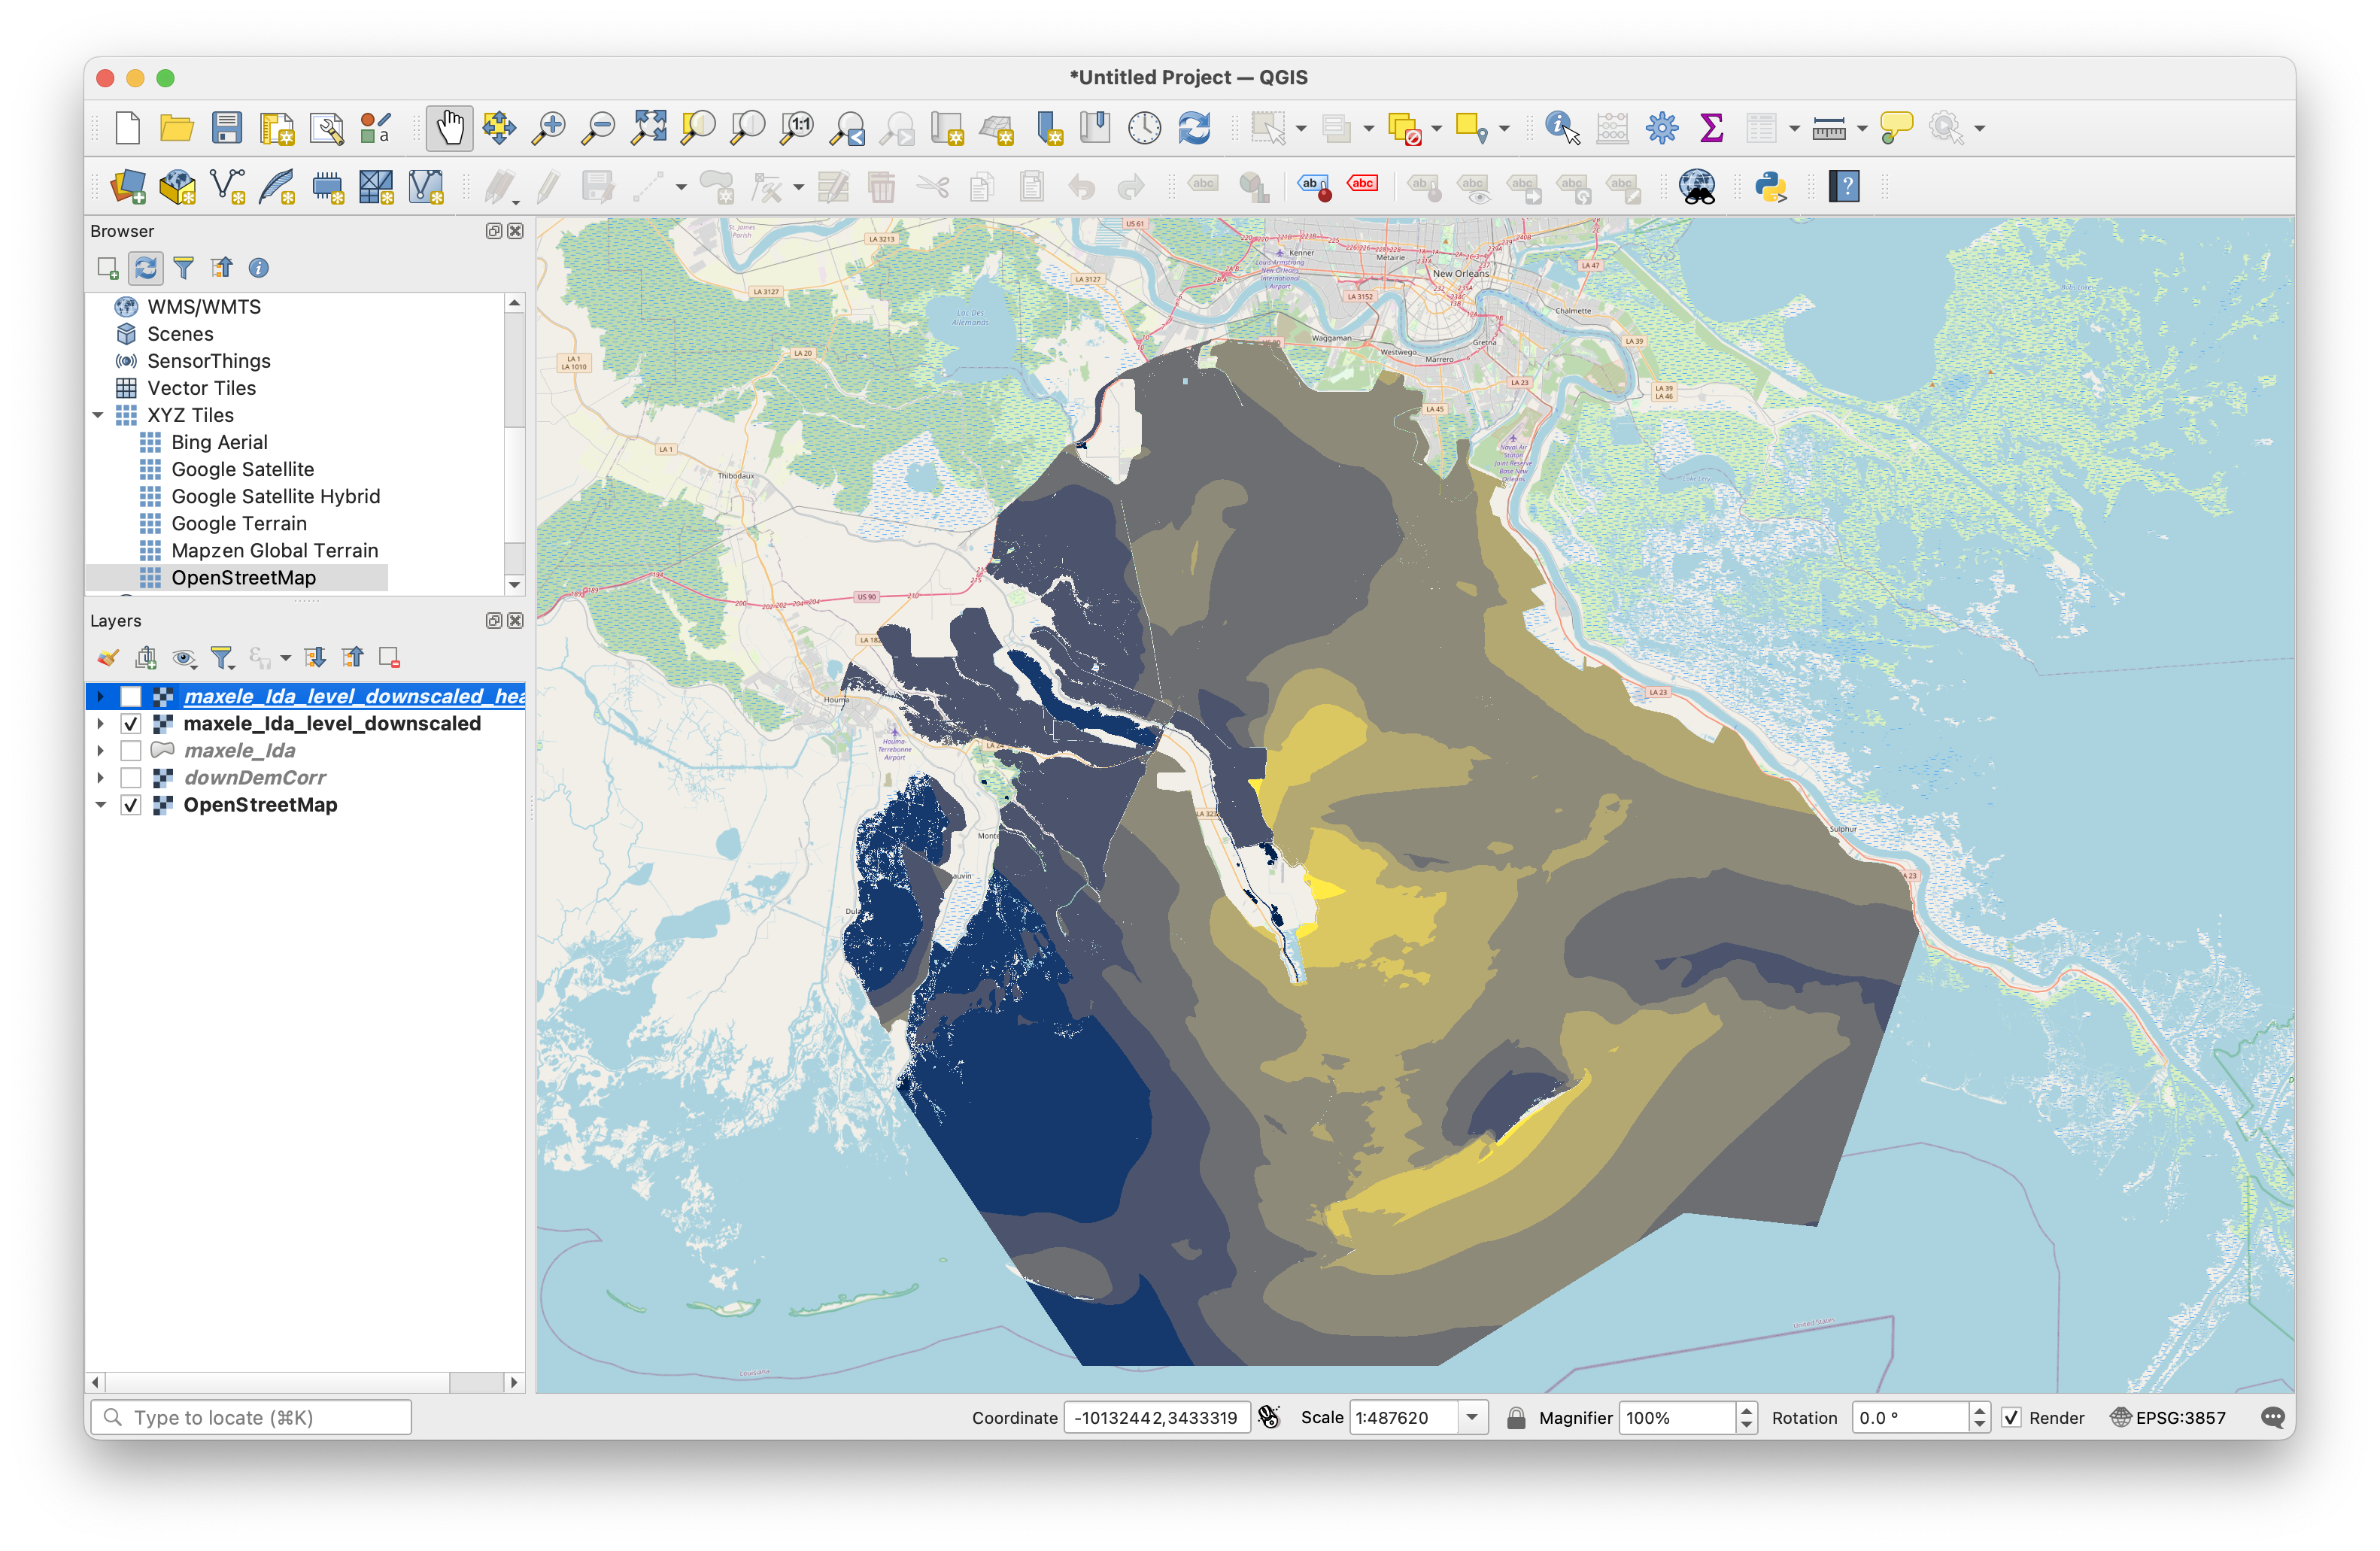

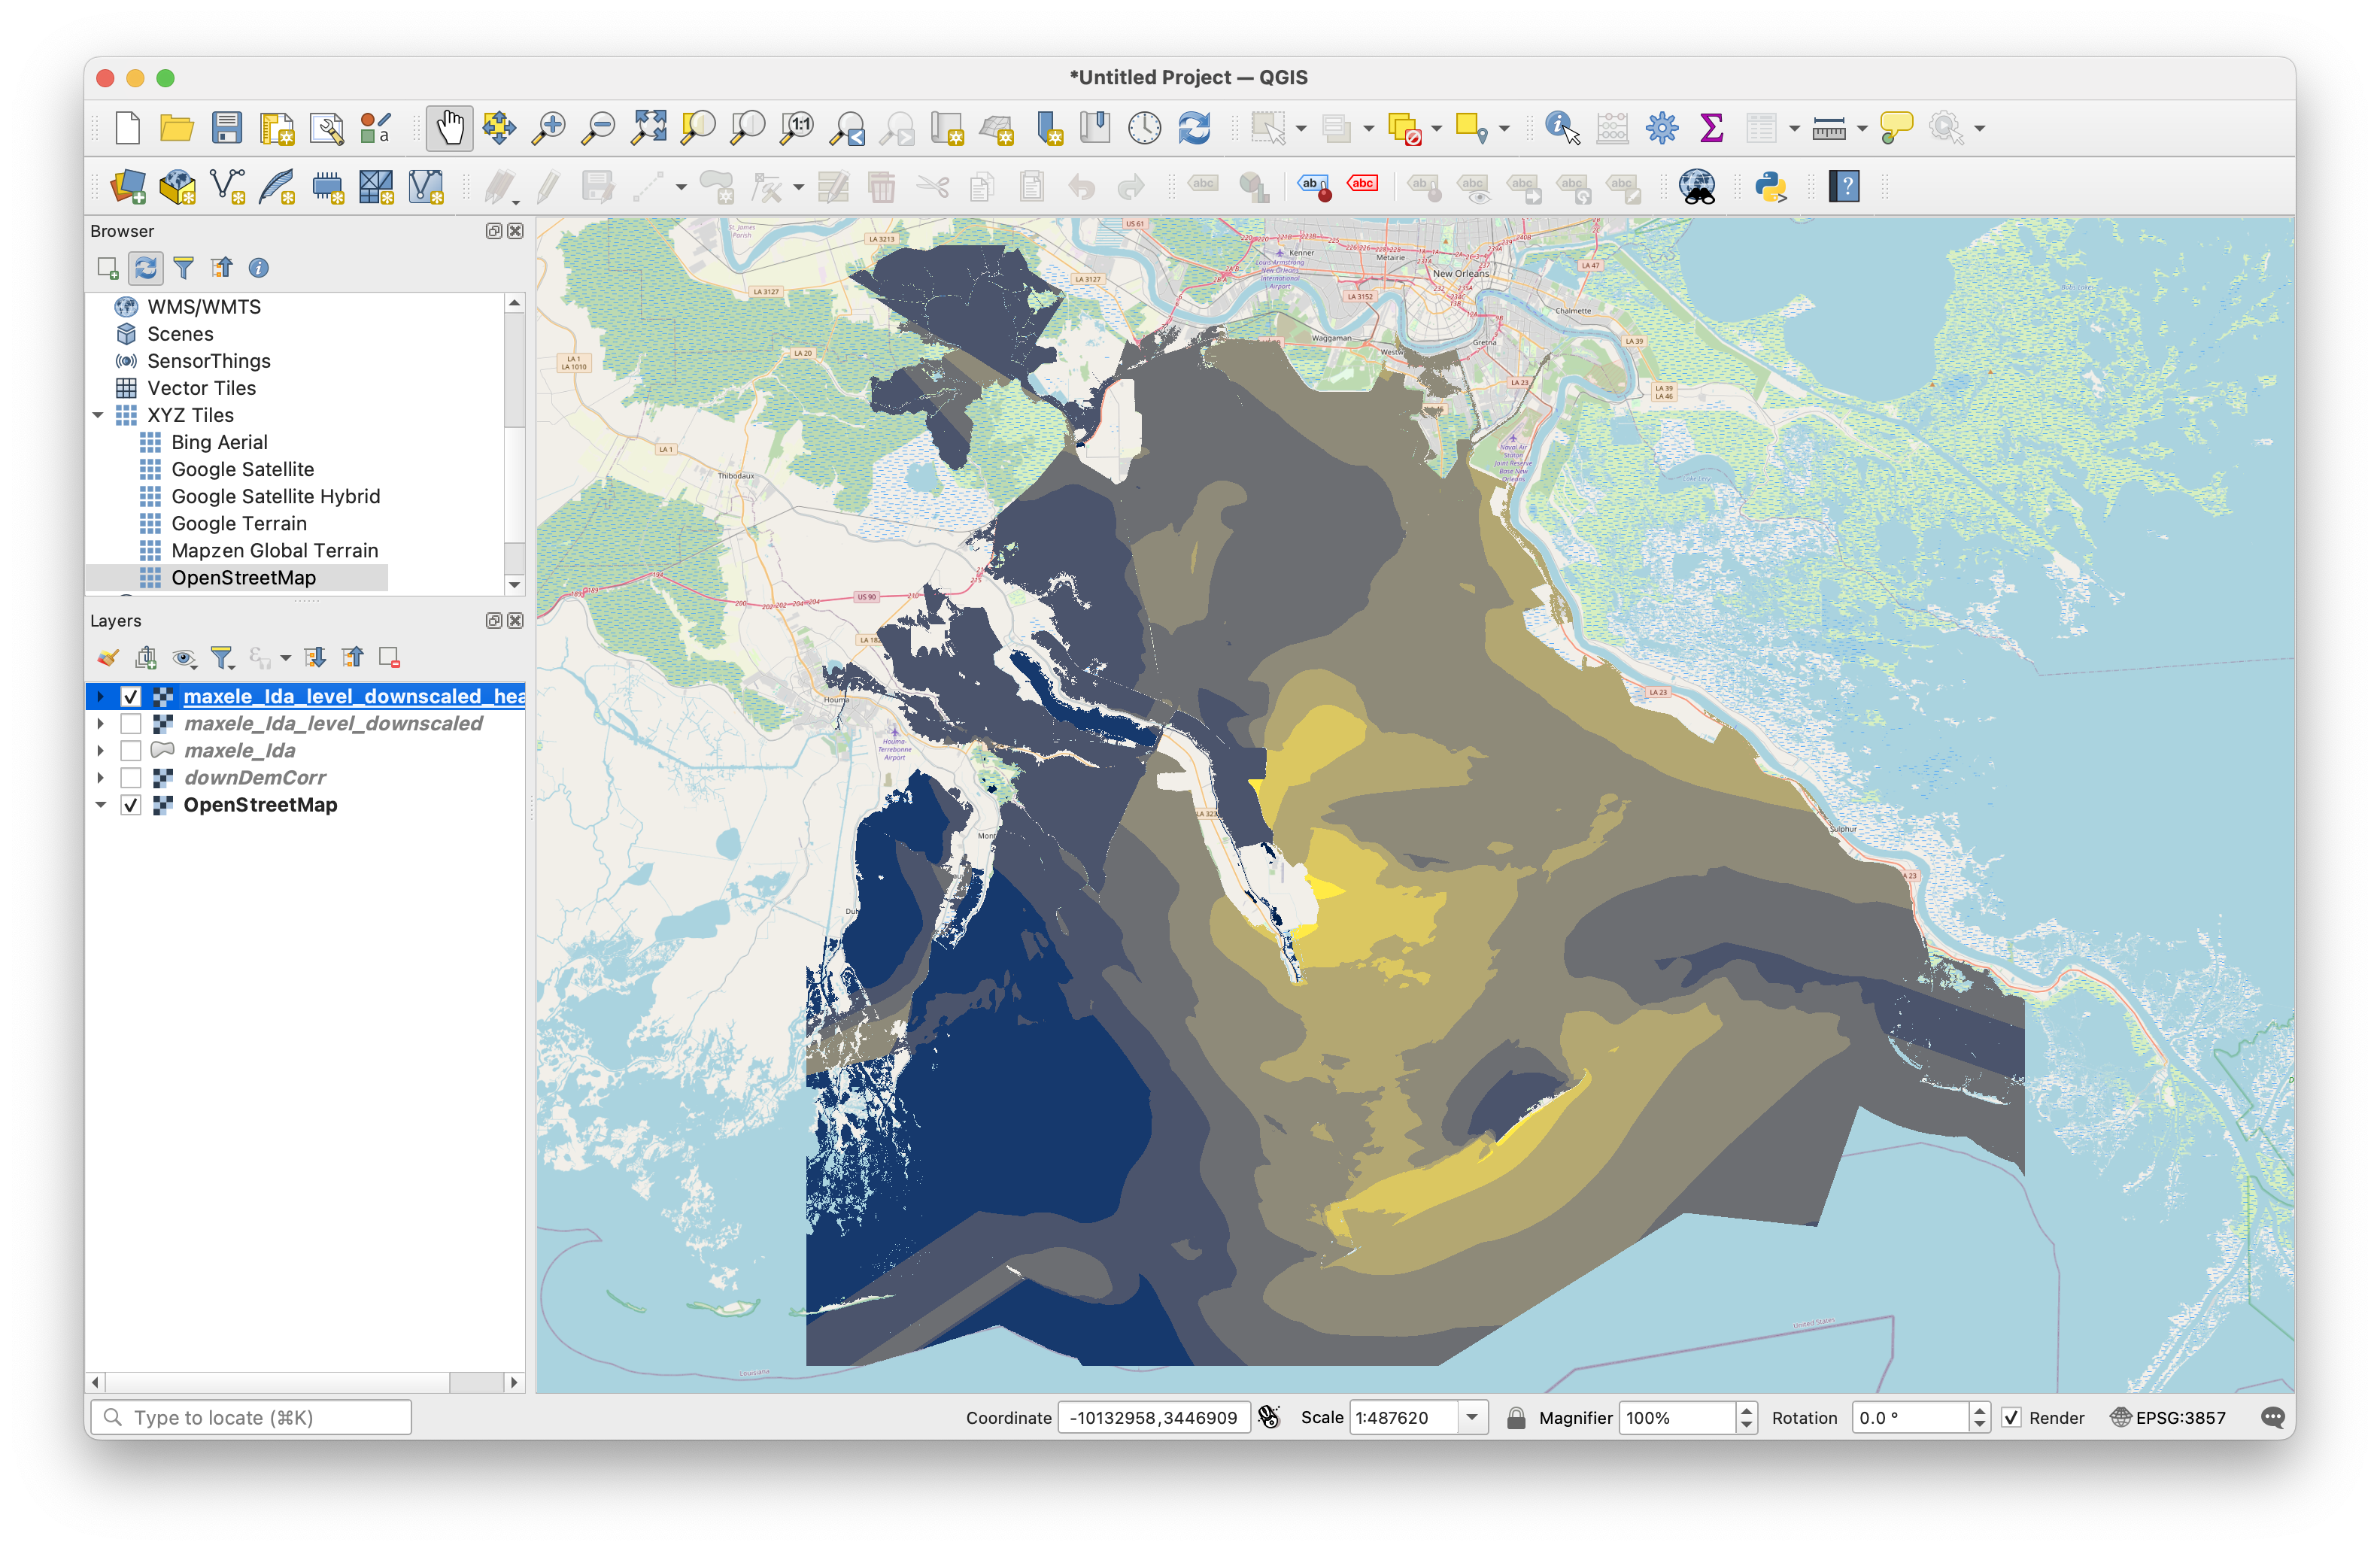

In [5]:
display(Image(filename=r'../../adds/imgs/example_4_2_a_ida_downscaled_static.png', width = 712))
display(Image(filename=r'../../adds/imgs/example_4_2_b_ida_downscaled_headLoss.png', width = 712))

## Housekeeping

The following cell is optional. We include it to keep clean the repository -- it will delete the shapefile and geoTIFF that we just created. For most users, this cell is not necessary.

In [6]:
os.remove(pathOutDownDemCorr)
os.remove(pathOutTotalCostRas)
os.remove(pathOutRawCostRas)

shutil.rmtree('grassLoc')

for x in [x for x in os.listdir('.') if x.startswith('Ida_headLoss')]:
    os.remove(x)

Good luck with Kalpana! See you in future examples!